<a href="https://colab.research.google.com/github/bhattrahul301/Assignment1/blob/DS-certification/Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tweepy
import requests
import base64

consumer_secret ='w2VsvHVjBxFyhkXM9iAQRgNlBVd4wxn7rWz0bfT4lPpCs4m6Xc'
consumer_key = '4uBaCpHmoGzLPv4mDfRkiYHTI'

key_secret = '{}:{}'.format(consumer_key, consumer_secret).encode('ascii')
b64_encoded_key = base64.b64encode(key_secret)
b64_encoded_key = b64_encoded_key.decode('ascii')

base_url = 'https://api.twitter.com/'
auth_url = '{}oauth2/token'.format(base_url)
auth_headers = {
    'Authorization': 'Basic {}'.format(b64_encoded_key),
    'Content-Type': 'application/x-www-form-urlencoded;charset=UTF-8'
}

auth_data = {
    'grant_type': 'client_credentials'
}

auth_resp = requests.post(auth_url, headers=auth_headers, data=auth_data)

print(auth_resp.status_code)
access_token = auth_resp.json()['access_token']
trend_headers = {
    'Authorization': 'Bearer {}'.format(access_token)    
}

trend_params = {
    'id': 23424848,
}

trend_url = 'https://api.twitter.com/1.1/trends/place.json'  
trend_resp = requests.get(trend_url, headers=trend_headers, params=trend_params)
tweet_data = trend_resp.json()

200


In [ ]:
tweet_data

[{'trends': [{'name': '#PhattaPosterNiklaMinions',
    'url': 'http://twitter.com/search?q=%23PhattaPosterNiklaMinions',
    'promoted_content': None,
    'query': '%23PhattaPosterNiklaMinions',
    'tweet_volume': None},
   {'name': '#SangrurBypoll',
    'url': 'http://twitter.com/search?q=%23SangrurBypoll',
    'promoted_content': None,
    'query': '%23SangrurBypoll',
    'tweet_volume': None},
   {'name': '#AAPSweepsRajinderNagar',
    'url': 'http://twitter.com/search?q=%23AAPSweepsRajinderNagar',
    'promoted_content': None,
    'query': '%23AAPSweepsRajinderNagar',
    'tweet_volume': None},
   {'name': '#MiShivsainik',
    'url': 'http://twitter.com/search?q=%23MiShivsainik',
    'promoted_content': None,
    'query': '%23MiShivsainik',
    'tweet_volume': 11318},
   {'name': 'seokjin',
    'url': 'http://twitter.com/search?q=seokjin',
    'promoted_content': None,
    'query': 'seokjin',
    'tweet_volume': 326723},
   {'name': '#byelection2022',
    'url': 'http://twitter.co

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = [(i['name'],i['tweet_volume']) for i in tweet_data[0]['trends']]

In [ ]:
df = pd.DataFrame(columns = ['name','volume'],data = data )

In [ ]:
df

,name,volume
0,#PhattaPosterNiklaMinions,NaN
1,#SangrurBypoll,NaN
2,#AAPSweepsRajinderNagar,NaN
3,#MiShivsainik,11318.0
4,seokjin,326723.0
5,#byelection2022,NaN
6,Rampur,NaN
7,Karma Strikes Back In SSRCase,85842.0
8,Chapter 2,96242.0
9,Punjab,40272.0


In [ ]:
filtered_df = df.dropna()

In [ ]:
filtered_df

,name,volume
3,#MiShivsainik,11318.0
4,seokjin,326723.0
7,Karma Strikes Back In SSRCase,85842.0
8,Chapter 2,96242.0
9,Punjab,40272.0
17,Munich,45788.0
20,HOLY MOLY,27190.0
28,hobi,286907.0
29,Germany,136412.0
30,International Day,16867.0


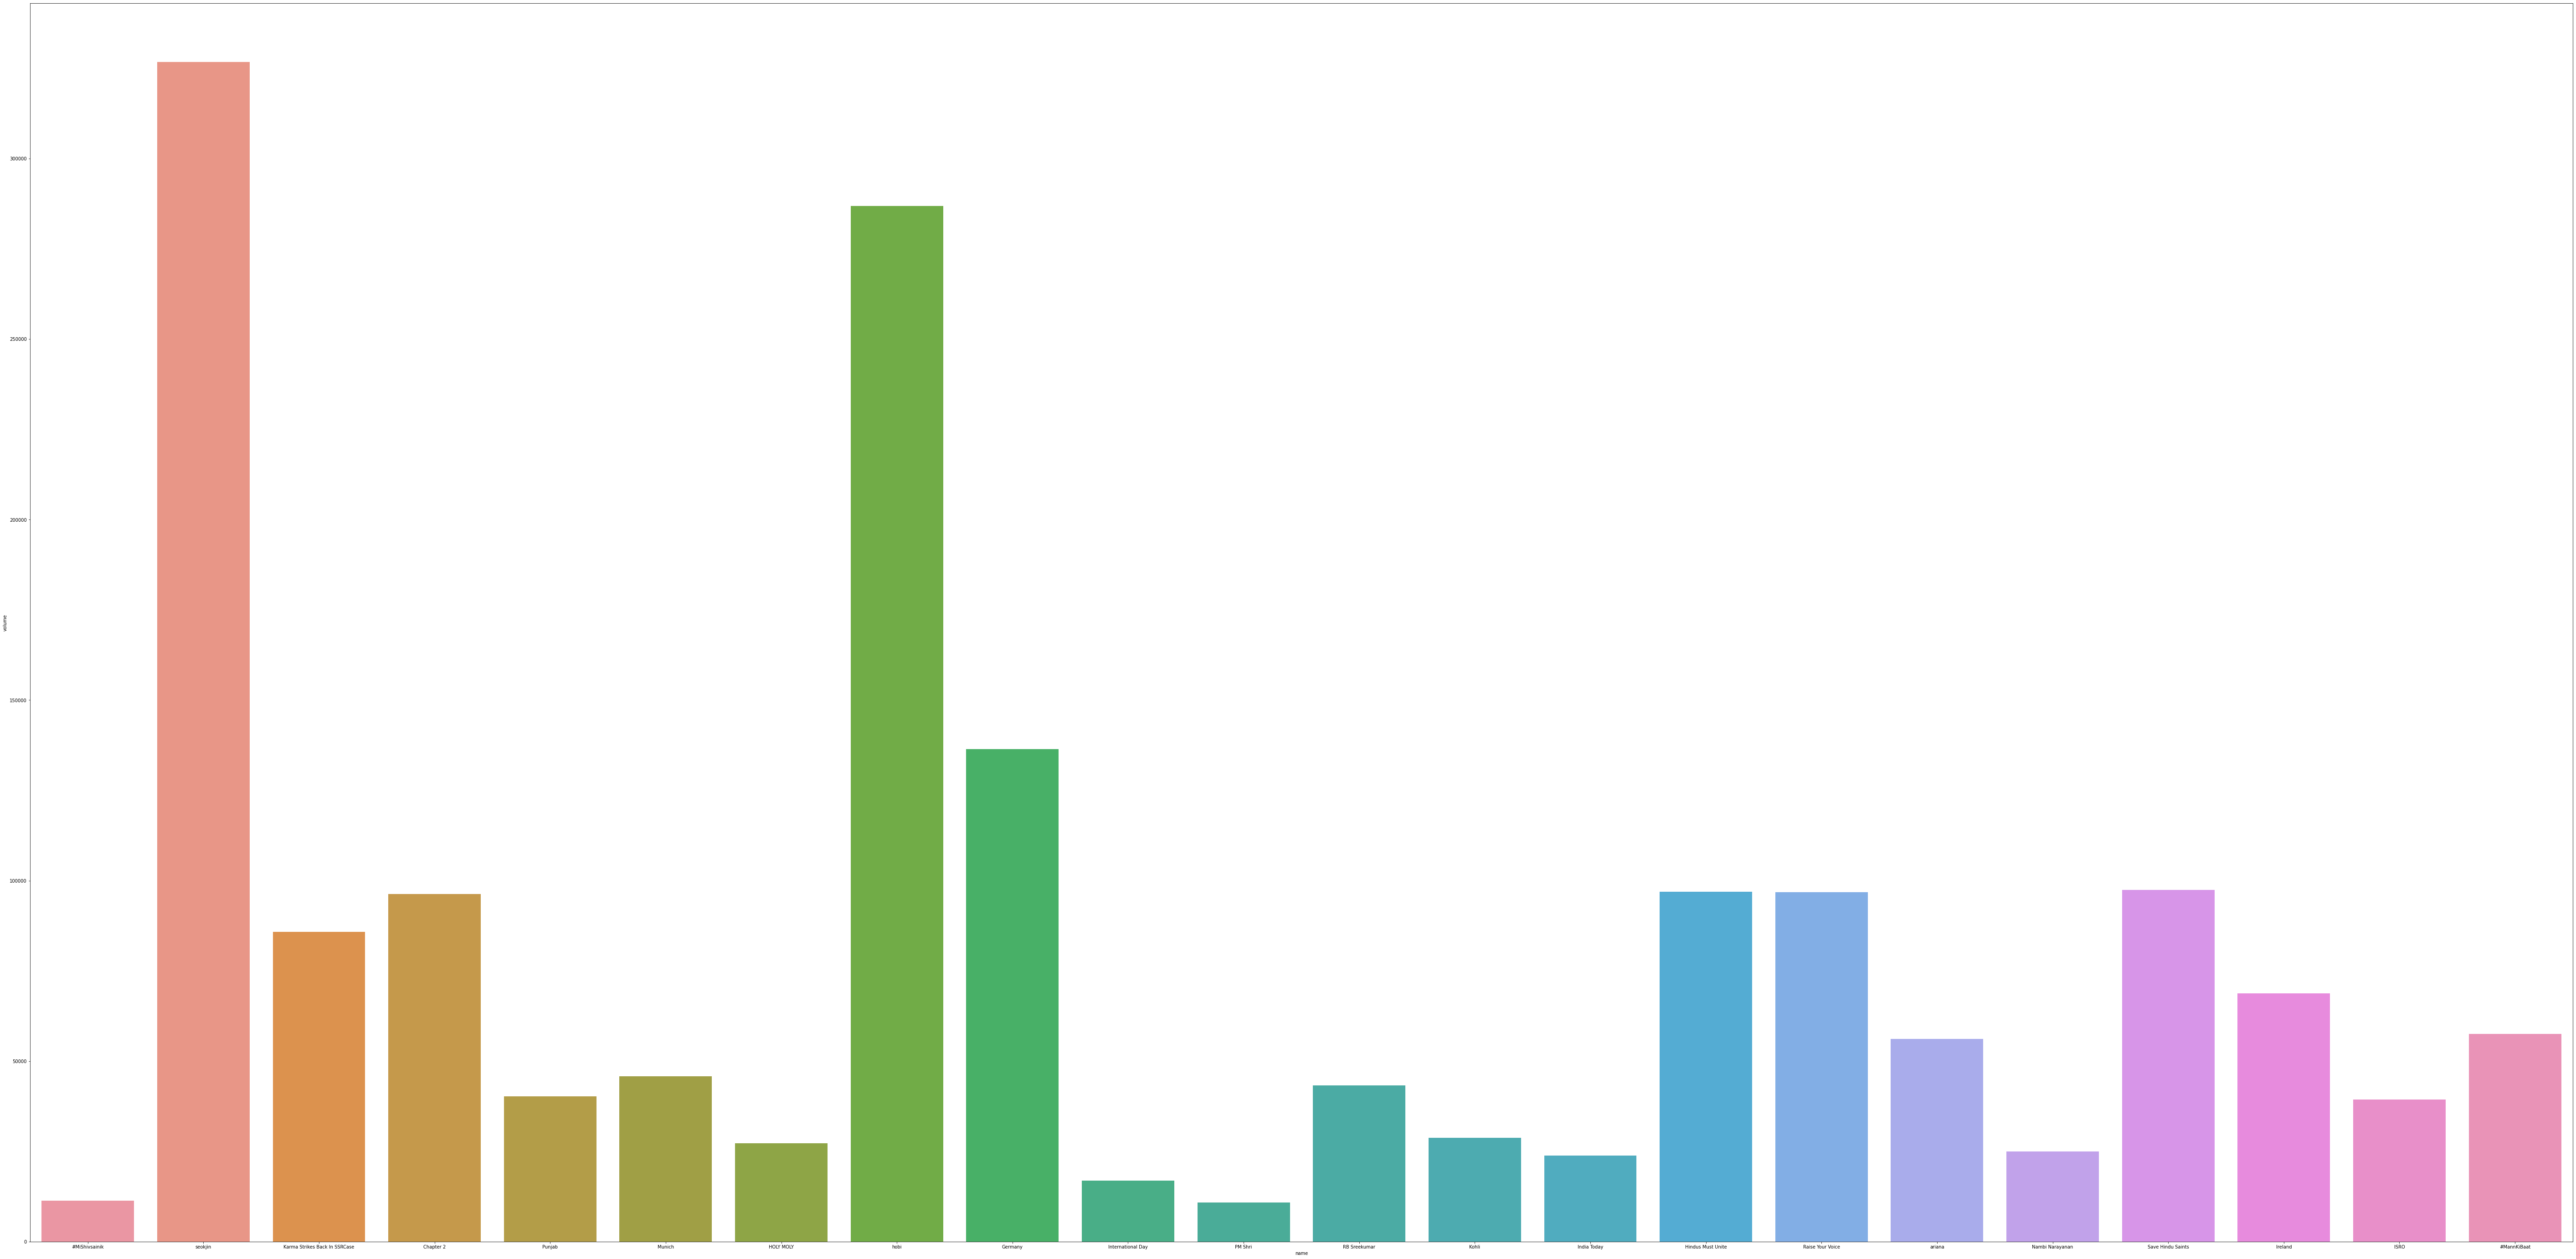

In [ ]:
plt.figure(figsize=(100,50))
g = sns.barplot(x=filtered_df['name'],y=df['volume'])

In [ ]:
top10_df = filtered_df.sort_values(by='volume',ascending=False)
top10_df.reset_index(inplace=True)
top10_df = top10_df.iloc[0:10,:]
top10_df

,index,name,volume
0,4,seokjin,326723.0
1,28,hobi,286907.0
2,29,Germany,136412.0
3,40,Save Hindu Saints,97396.0
4,36,Hindus Must Unite,96857.0
5,37,Raise Your Voice,96781.0
6,8,Chapter 2,96242.0
7,7,Karma Strikes Back In SSRCase,85842.0
8,42,Ireland,68823.0
9,44,#MannKiBaat,57468.0


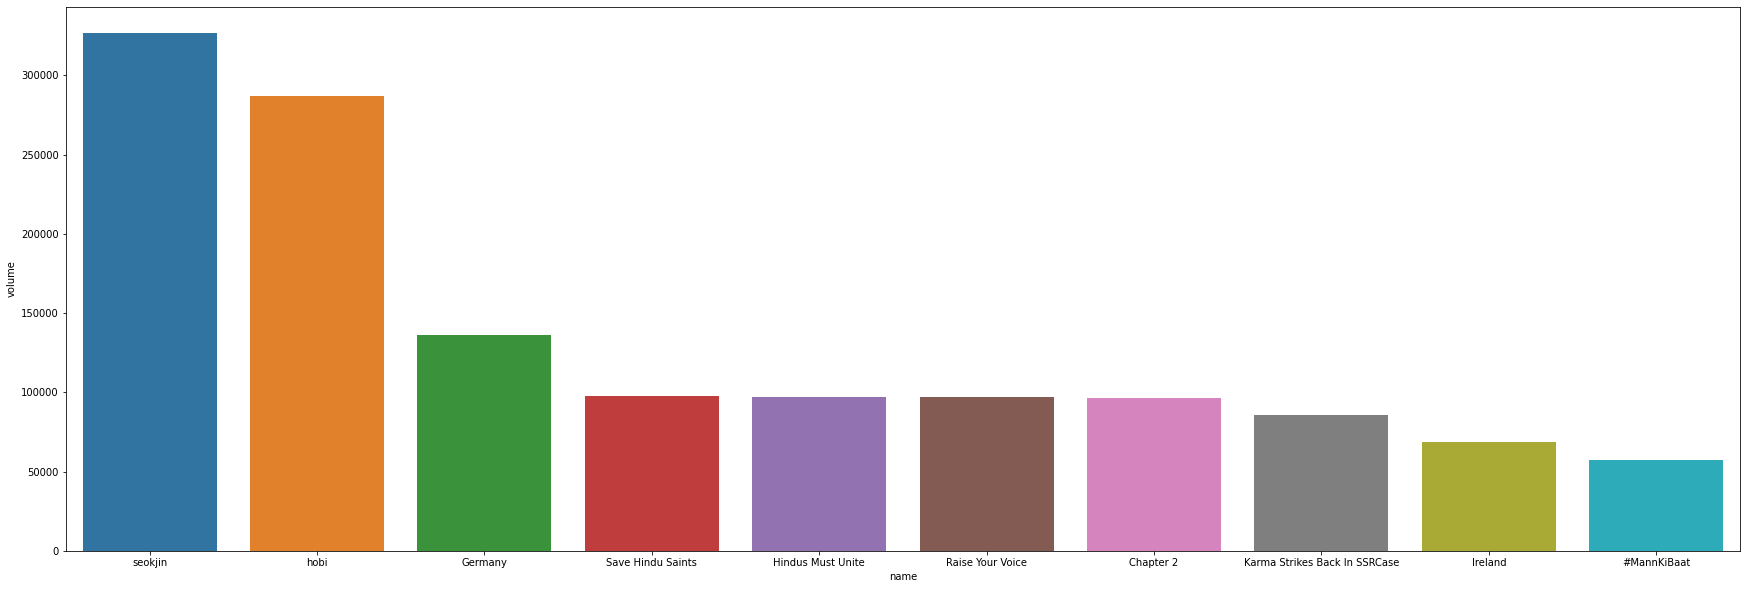

In [ ]:
plt.figure(figsize=(30,10))
g = sns.barplot(x=top10_df['name'],y=top10_df['volume'])

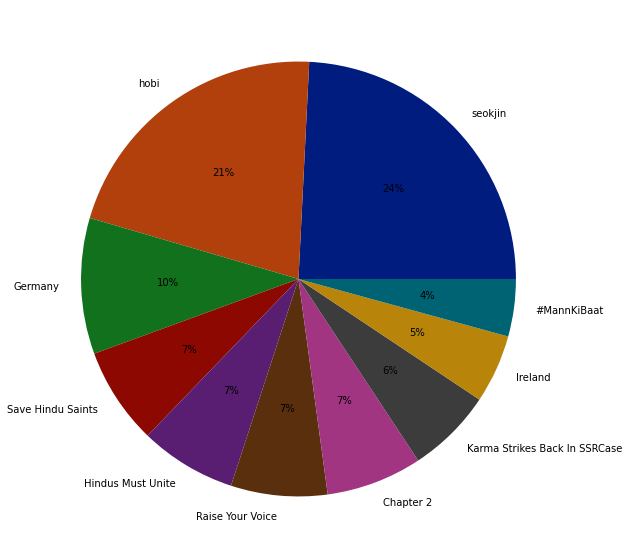

In [ ]:
plt.figure(figsize=(10,10))
palette_color = sns.color_palette('dark')
plt.pie(top10_df['volume'], labels=top10_df['name'], colors=palette_color, autopct='%.0f%%')
plt.show()

In [ ]:
import ipywidgets as widgets

## Interactive DashBoard to choose top N number of hastags

In [ ]:
plt.figure(figsize=(10,10))
palette_color = sns.color_palette('dark')
a = widgets.IntSlider(description='count', min=0,max=10)

def f(a):
    plt.pie(top10_df['volume'][0:a], labels=top10_df['name'][0:a], colors=palette_color, autopct='%.0f%%')
    plt.show()

out = widgets.interactive_output(f, {'a': a})

widgets.HBox([widgets.VBox([a]), out])

<Figure size 720x720 with 0 Axes>

## Interactive DashBoard to get top 10 Hashtags by city names

In [ ]:
import json
with open(r'C:\Users\52296881\Downloads\India_woeid.json','r') as f:
    obj = json.load(f)

In [ ]:
cities = {}
for c in obj:
    cities[c['name']] = c['woeid']
databycity = {}

for city in cities:
    trend_params = {
        'id': cities[city],
    }

    trend_url = 'https://api.twitter.com/1.1/trends/place.json'  
    trend_resp = requests.get(trend_url, headers=trend_headers, params=trend_params)
    data = trend_resp.json()
    city = data[0]['locations'][0]['name']
    data = [(i['name'],i['tweet_volume']) for i in data[0]['trends']]
    df = pd.DataFrame(columns = ['name','volume'],data = data)
    df.dropna(inplace = True)
    databycity[city] = df

In [ ]:
databycity.keys()

dict_keys(['Nagpur', 'Lucknow', 'Kanpur', 'Patna', 'Ranchi', 'Kolkata', 'Srinagar', 'Amritsar', 'Jaipur', 'Ahmedabad', 'Rajkot', 'Surat', 'Bhopal', 'Indore', 'Thane', 'Mumbai', 'Pune', 'Hyderabad', 'Bangalore', 'Chennai'])

In [ ]:
databycity['Nagpur']['volume'][0:5]

3     11317.0
4    326635.0
6     86063.0
7     96193.0
9     40262.0
Name: volume, dtype: float64

In [ ]:
plt.figure(figsize=(15,15))
palette_color = sns.color_palette('dark')
a =widgets.Dropdown(options=list(databycity.keys()),description='City Names:',disabled=False)

def f(a):
    plt.pie(databycity[a]['volume'][0:10], labels=databycity[a]['name'][0:10], colors=palette_color, autopct='%.0f%%')
    plt.show()

out = widgets.interactive_output(f, {'a': a})

widgets.HBox([widgets.VBox([a]), out])

<Figure size 1080x1080 with 0 Axes>